<a href="https://colab.research.google.com/github/GiorgosLyberis/mcda/blob/main/Methods%20For%20Statistical%20Data%20Analysis/Lab_2/Lab_2(python).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<Axes: ylabel='Count'>

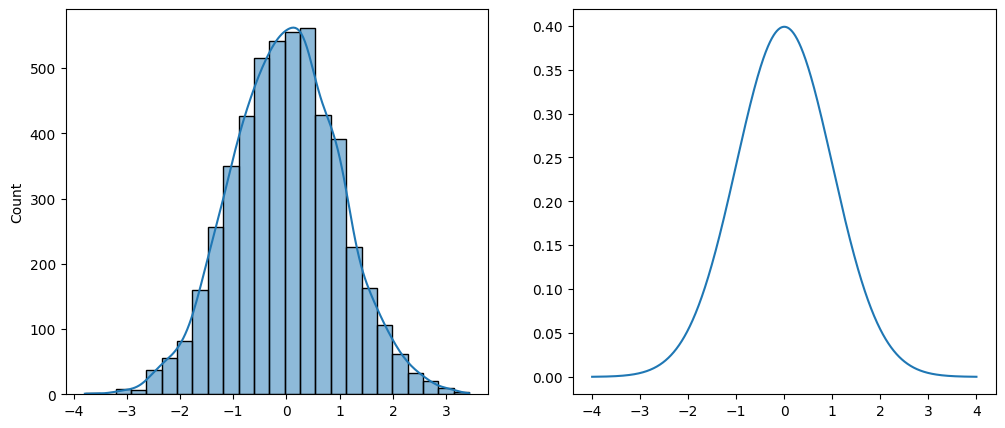

-0.009317950490965819

1.0088684301378674

In [3]:
z = np.random.normal(loc=0, scale=1, size=5000)

x = np.linspace(-4, 4, 1000)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.histplot(data=z, kde=True, bins=25, ax=axs[0])
axs[1].plot(x, stats.norm.pdf(x, loc=0, scale=1))
plt.show()

np.mean(z)
np.std(z)

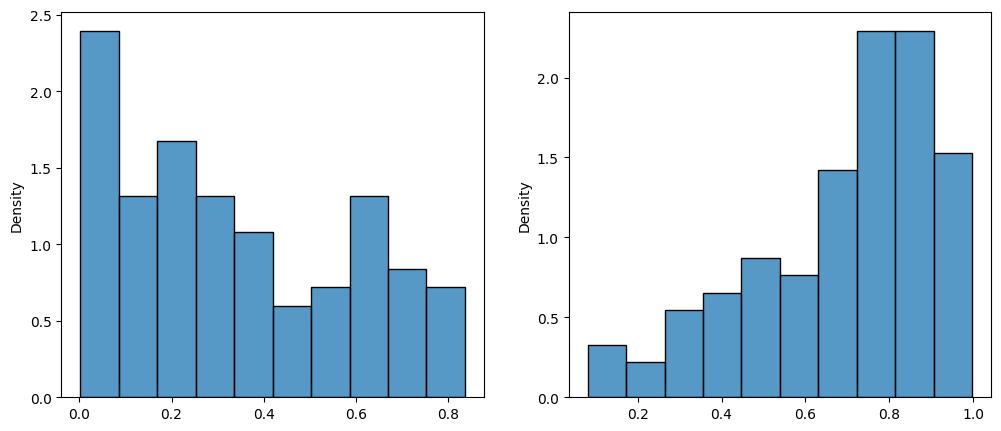

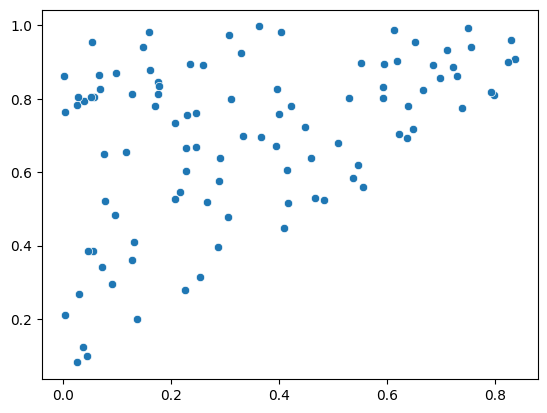

Mean of mU: 0.3426167229416627
Variance of mU: 0.06102329143771163

Mean of MU: 0.6958635281770811
Variance of MU: 0.050195520386041845

Covariance of mU and MU: [[0.06163969 0.02434355]
 [0.02434355 0.05070255]]


In [4]:
def mM1_unif(n, M):
    '''
    n: Sample size
    M: Simulation steps
    '''
    # The following block is more intuitive
    mU = np.empty((M,))
    MU = np.empty((M,))
    for k in range(M):
        U = np.random.uniform(low=0., high=1., size=n)
        U = np.sort(U)
        mU[k] = U[0]
        MU[k] = U[-1]

    # The following block is more efficient
    # U = np.random.uniform(low=0., high=1., size=(M, n))
    # mU = np.min(U, axis=1)
    # MU = np.max(U, axis=1)

    fig1, axs = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=mU, ax=axs[0], stat='density', bins=10)
    sns.histplot(data=MU, ax=axs[1], stat='density', bins=10)
    plt.show()

    plt.figure()
    sns.scatterplot(x=mU, y=MU)
    plt.show()

    print(f"Mean of mU: {np.mean(mU)}\nVariance of mU: {np.var(mU)}\n")
    print(f"Mean of MU: {np.mean(MU)}\nVariance of MU: {np.var(MU)}\n")
    print(f"Covariance of mU and MU: {np.cov(mU, MU)}")


mM1_unif(2, 100)

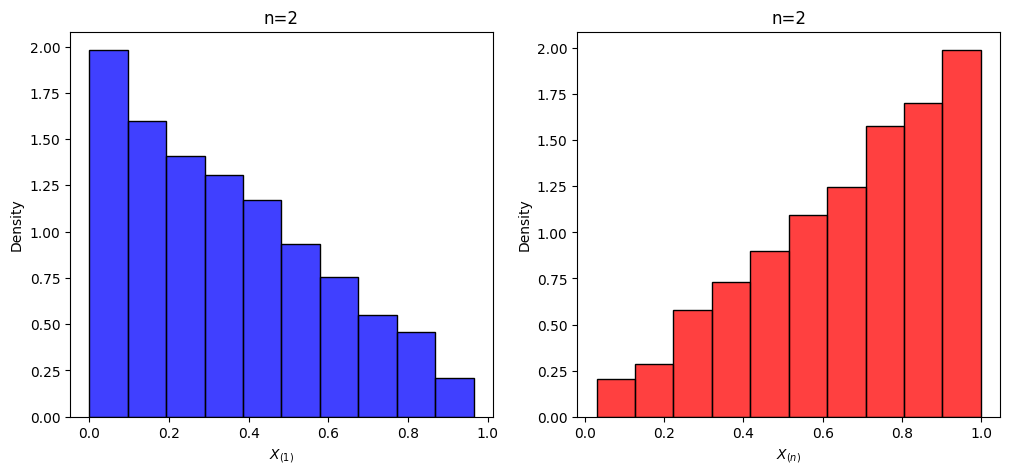

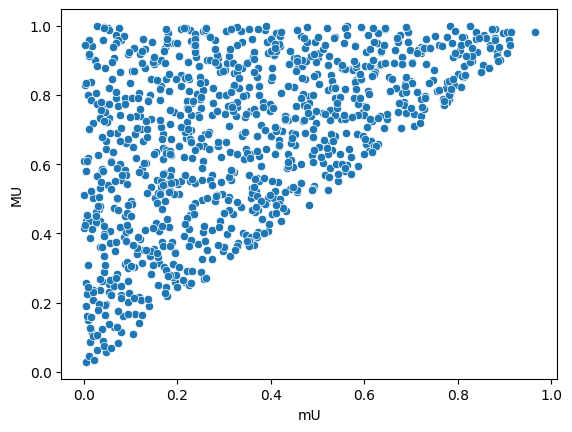

E(X(1))=0.3333333333333333 var(X(1))=0.05555555555555555
Mean of mU: 0.3402192134097067 Variance of mU: 0.057325365911040704
E(X(n))=0.6666666666666666 var(X(n))=0.05555555555555555
Mean of MU: 0.6710087949025278 Variance of MU: 0.05653066413535778
cov(X(1),X(n))=0.027777777777777776
Covariance of mU and MU: 0.029534145742135892


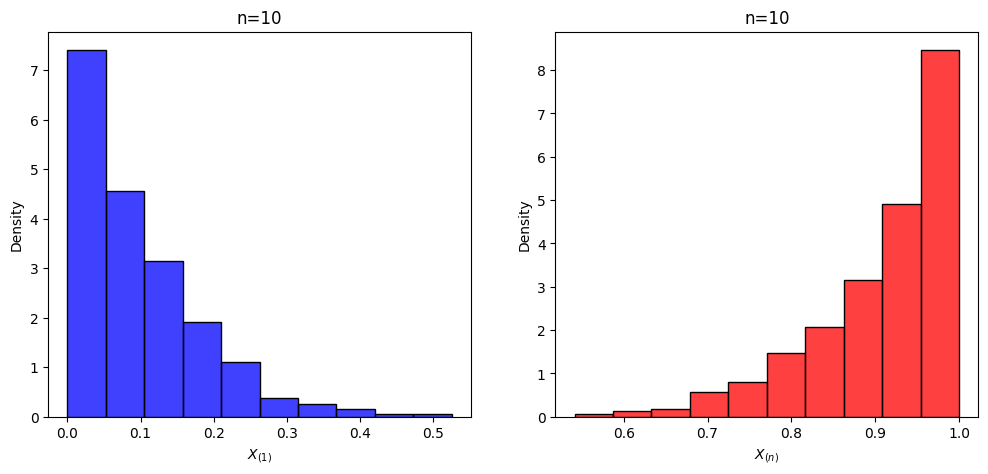

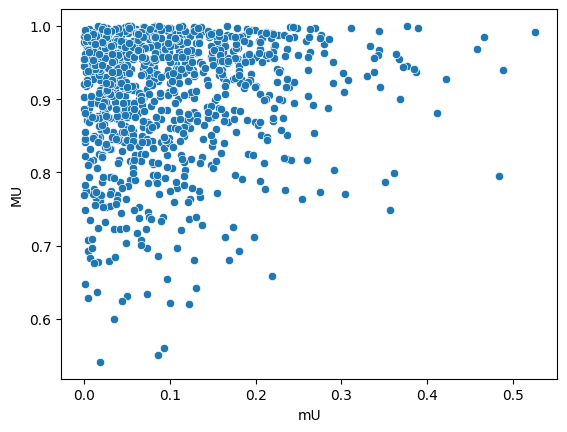

E(X(1))=0.09090909090909091 var(X(1))=0.006887052341597796
Mean of mU: 0.0968933957989629 Variance of mU: 0.007283405120950517
E(X(n))=0.9090909090909091 var(X(n))=0.006887052341597796
Mean of MU: 0.9081330244025047 Variance of MU: 0.006970397538878144
cov(X(1),X(n))=0.0006887052341597796
Covariance of mU and MU: 0.0005305330643297104


In [5]:
def mM1_unif(n, M):
    '''
    n: Sample size
    M: Simulation steps
    '''
    # The following block is more intuitive
    mU = np.empty((M,))
    MU = np.empty((M,))
    for k in range(M):
        U = np.random.uniform(low=0., high=1., size=n)
        U = np.sort(U)
        mU[k] = U[0]
        MU[k] = U[-1]

    # The following block is more efficient
    # U = np.random.uniform(low=0., high=1., size=(M, n))
    # mU = np.min(U, axis=1)
    # MU = np.max(U, axis=1)

    _, axs = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(data=mU, ax=axs[0], stat='density', bins=10, color='blue')
    axs[0].set_title(f'n={n}')
    axs[0].set_xlabel(r'$X_{(1)}$')
    sns.histplot(data=MU, ax=axs[1], stat='density', bins=10, color='red')
    axs[1].set_title(f'n={n}')
    axs[1].set_xlabel(r'$X_{(n)}$')
    plt.show()

    plt.figure()
    sns.scatterplot(x=mU, y=MU)
    plt.xlabel('mU')
    plt.ylabel('MU')
    plt.show()

    print(f"E(X(1))={1/(n+1)} var(X(1))={n/((n+1)**2*(n+2))}")
    print(f"Mean of mU: {np.mean(mU)} Variance of mU: {np.var(mU)}")
    print(f"E(X(n))={n/(n+1)} var(X(n))={n/((n+1)**2*(n+2))}")
    print(f"Mean of MU: {np.mean(MU)} Variance of MU: {np.var(MU)}")
    print(f"cov(X(1),X(n))={1/((n+2)*(n+1)**2)}")
    print(f"Covariance of mU and MU: {np.cov(mU, MU)[0, 1]}")


mM1_unif(2, 1000)
mM1_unif(10, 1000)

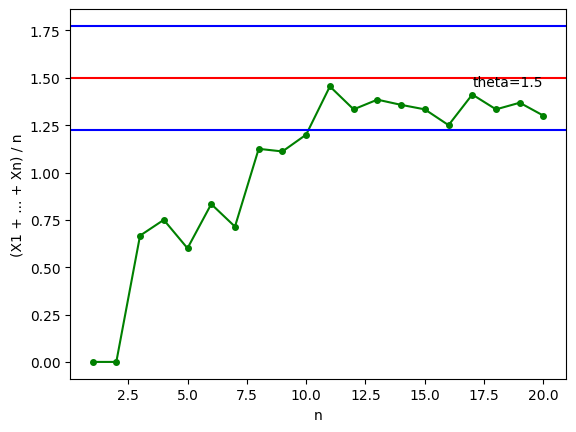

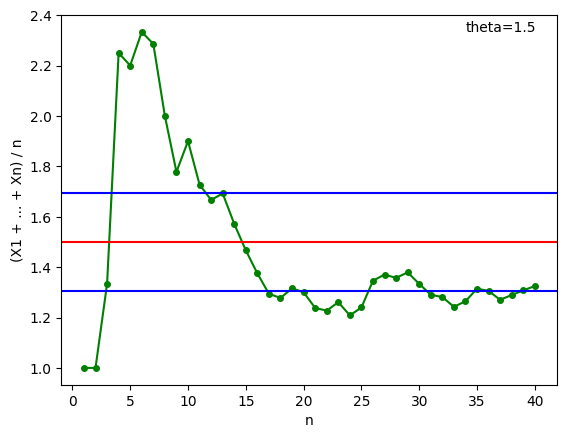

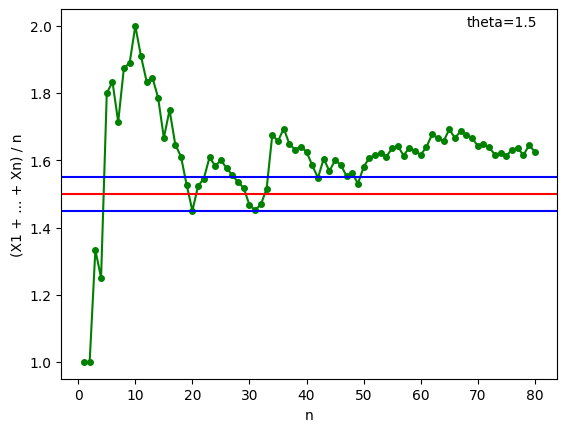

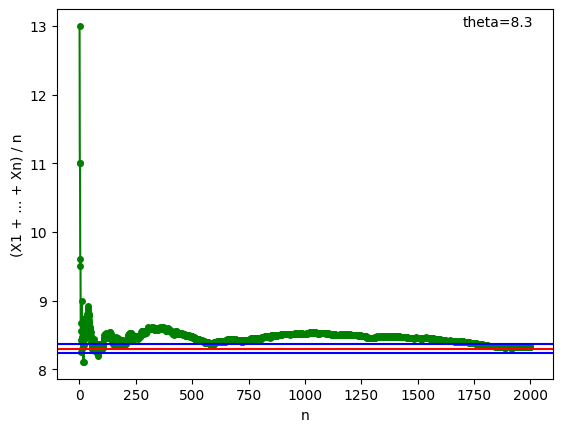

In [6]:
def WL_Pois(N, th, e=None):
    if e is None:
        e = np.sqrt(th / N)
    x = np.random.poisson(lam=th, size=N)
    # More intuitive
    y = [np.mean(x[:i]) for i in range(1, N + 1)]
    y = np.array(y)
    # More efficient
    # y = np.cumsum(x) / np.arange(1, N + 1)
    n = np.arange(1, N + 1)
    plt.figure()
    plt.plot(n, y, 'o', markersize=4, color='green', linestyle='-')

    plt.xlabel("n")
    plt.ylabel("(X1 + ... + Xn) / n")
    plt.text(N * 0.85, max(y), f"theta={th}")

    plt.axhline(y=th, color='red')  # Theoretical mean
    plt.axhline(y=th + e, color='blue')  # Upper bound of confidence interval
    plt.axhline(y=th - e, color='blue')  # Lower bound of confidence interval
    plt.show()

WL_Pois(20, 1.5)
WL_Pois(40, 1.5)
WL_Pois(80, 1.5, 0.05)
WL_Pois(2_000, 8.3)

E(bar(X))=1.4 var(bar(X))=0.13999999999999999
Empirical Mean: 1.4190999999999998 Empirical Variance: 0.13934519


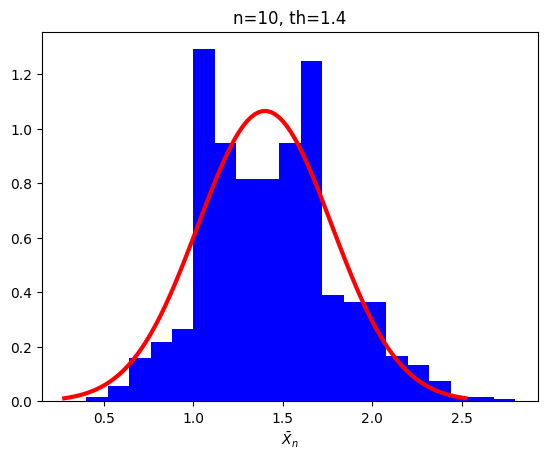

E(bar(X))=1.4 var(bar(X))=0.04666666666666666
Empirical Mean: 1.4005666666666665 Empirical Variance: 0.046149678888888886


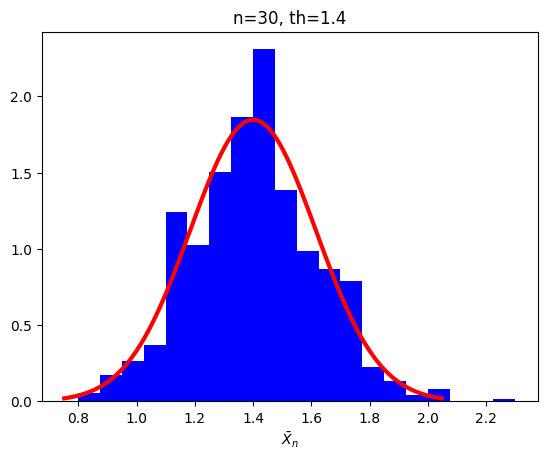

E(bar(X))=2.5 var(bar(X))=0.025
Empirical Mean: 2.50408 Empirical Variance: 0.026123953600000003


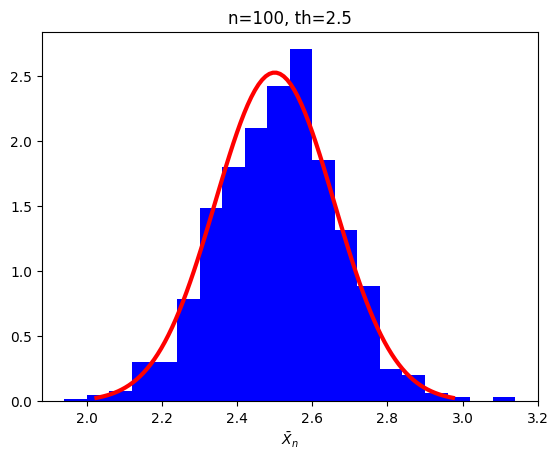

In [7]:
def CLT_Pois(n, th):
    M = 1000
    # More intuitive
    y = np.empty(M)
    for k in range(M):
        x = np.random.poisson(lam=th, size=n)
        y[k] = np.mean(x)

    # More efficient
    # x = np.random.poisson(lam=th, size=(M, n))
    # y = np.mean(x, axis=1)

    mXbar = th
    varXbar = th / n
    print(f"E(bar(X))={mXbar} var(bar(X))={varXbar}")
    print(f"Empirical Mean: {np.mean(y)} Empirical Variance: {np.var(y)}")

    plt.hist(y, bins=20, density=True, color="blue")
    plt.xlabel(r"$\bar{X}_n$")
    plt.title(f"n={n}, th={th}")

    # Normal distribution curve
    x = np.linspace(mXbar - 3*np.sqrt(varXbar), mXbar + 3*np.sqrt(varXbar), 100)
    plt.plot(x, stats.norm.pdf(x, mXbar, np.sqrt(varXbar)), linewidth=3, color="red")
    plt.show()

CLT_Pois(10, 1.4)
CLT_Pois(30, 1.4)
CLT_Pois(100, 2.5)